# **Logistic Regression**
**GUNGUN JAIN | T085**

In [1]:
# Loading Data for BlinkIT Grocery Dataset
import pandas as pd

# load dataset
data = pd.read_csv("/content/adult.csv")

# preview dataset
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2]:
# Create binary label: 1 = income == '>50K', 0 otherwise
data['label'] = (data['income'] == '>50K').astype(int)

# Select feature columns (numeric columns available in this dataset)
feature_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Drop missing values
data = data.dropna(subset=feature_cols + ['label'])

# Define X and y
X = data[feature_cols]
y = data['label']

print("Missing values in X:")
print(X.isnull().sum())

print("\nLabel distribution:")
print(y.value_counts())


Missing values in X:
age               0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

Label distribution:
label
0    24720
1     7841
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

print("Missing values in X_train:")
print(X_train.isnull().sum())

print("\nMissing values in X_test:")
print(X_test.isnull().sum())


Missing values in X_train:
age               0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

Missing values in X_test:
age               0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64


In [4]:
# Model Development and Prediction
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)   # adult dataset needs higher iterations

# fit the model with data
logreg.fit(X_train, y_train)

# prediction
y_pred = logreg.predict(X_test)
print("Predicted Test Results : ", y_pred)
print("~" * 20)


Predicted Test Results :  [0 0 0 ... 0 0 1]
~~~~~~~~~~~~~~~~~~~~


In [5]:
# Model Evaluation using Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[5874,  319],
       [1209,  739]])

Text(0.5, 427.9555555555555, 'Predicted label')

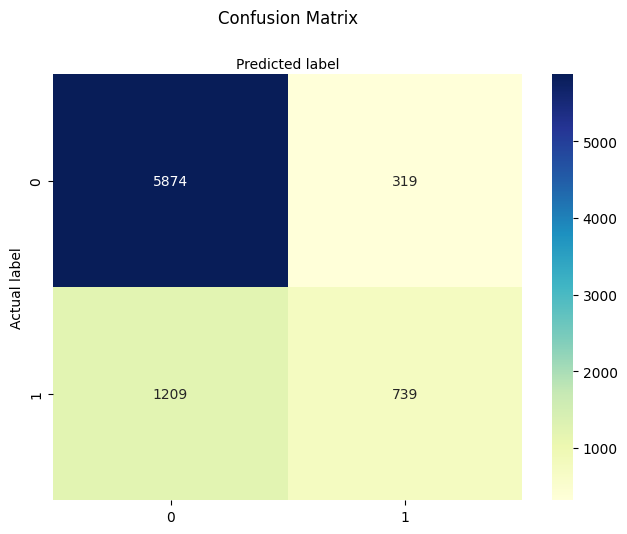

In [6]:
# Visualizing Confusion Matrix using Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names = ['<=50K', '>50K']   # names of income classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [7]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.8123080702616386
Precision: 0.6984877126654064
Recall: 0.37936344969199176


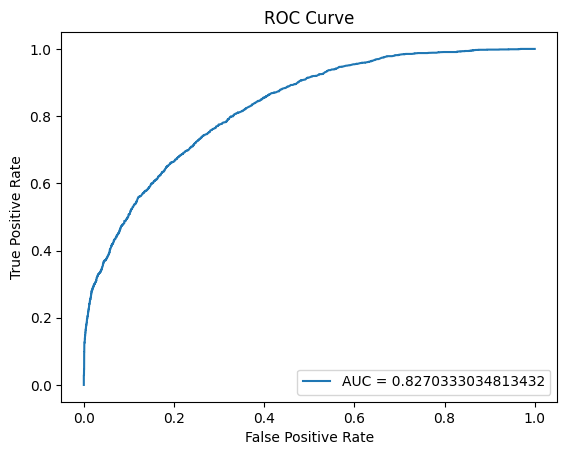

In [8]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
